# Adding Population 

Testing to see if adding the population to the data will get better predictive results

In [1]:
#pip install numpy==1.23.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement numpy==1.23.0
ERROR: No matching distribution found for numpy==1.23.0


In [2]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris

import graphviz
from graphviz import Digraph

import graphviz as gr

from sklearn import datasets
from sklearn import svm

# Merging New data

In [3]:
df6= pd.read_csv('Files/Population.csv')
df6.head()

,DATE,POPTOTUSA647NWDB
0,1/1/1960,180671000
1,1/1/1961,183691000
2,1/1/1962,186538000
3,1/1/1963,189242000
4,1/1/1964,191889000


In [4]:
df6.rename(columns={'POPTOTUSA647NWDB': 'Population'},inplace=True)
df6.index = df6.index + 1

In [5]:
df6.head()

,DATE,Population
1,1/1/1960,180671000
2,1/1/1961,183691000
3,1/1/1962,186538000
4,1/1/1963,189242000
5,1/1/1964,191889000


In [6]:
df6['year_only']=df6['DATE'].astype(str).str[4:8]

In [7]:
df6.head()

,DATE,Population,year_only
1,1/1/1960,180671000,1960
2,1/1/1961,183691000,1961
3,1/1/1962,186538000,1962
4,1/1/1963,189242000,1963
5,1/1/1964,191889000,1964


In [8]:
df6['year_only'] = df6['year_only'].astype(int)

In [9]:
Inflation_rate_vs_total_cost = pd.read_csv('Files/Inflation_rate_vs_total_cost.csv' , index_col=0)
Inflation_rate_vs_total_cost.head()

,year_only,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
0,1980,82383.333333,44434.8
1,1981,90933.333333,3392.1
2,1982,96533.333333,14765.9
3,1983,99583.333333,26005.6
4,1984,103933.333333,3124.5


In [10]:
infpop= Inflation_rate_vs_total_cost.merge(df6, how= 'inner', on = 'year_only')
infpop.head()

,year_only,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars),DATE,Population
0,1980,82383.333333,44434.8,1/1/1980,227225000
1,1981,90933.333333,3392.1,1/1/1981,229466000
2,1982,96533.333333,14765.9,1/1/1982,231664000
3,1983,99583.333333,26005.6,1/1/1983,233792000
4,1984,103933.333333,3124.5,1/1/1984,235825000


In [11]:
df1 = pd.read_csv('Files/df1.csv' , index_col=0)
df1.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5


In [12]:
df= df1.merge(infpop, how= 'inner', on = 'year_only')
df.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars)_x,Deaths,year_only,number_of_days,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)_y,DATE,Population
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7,82383.333333,44434.8,1/1/1980,227225000
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4,82383.333333,44434.8,1/1/1980,227225000
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182,82383.333333,44434.8,1/1/1980,227225000
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2,90933.333333,3392.1,1/1/1981,229466000
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5,90933.333333,3392.1,1/1/1981,229466000


In [13]:
df= df.drop('Total CPI-Adjusted Cost (Millions of Dollars)_y', axis=1)
df.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars)_x,Deaths,year_only,number_of_days,Inflation rate value,DATE,Population
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7,82383.333333,1/1/1980,227225000
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4,82383.333333,1/1/1980,227225000
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182,82383.333333,1/1/1980,227225000
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2,90933.333333,1/1/1981,229466000
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5,90933.333333,1/1/1981,229466000


# Dummies/pre processing

In [14]:
dummies = pd.get_dummies(df.Disaster)

In [15]:
df = pd.concat([df, dummies], axis = 'columns')

In [16]:
df

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars)_x,Deaths,year_only,number_of_days,Inflation rate value,DATE,Population,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7,82383.333333,1/1/1980,227225000,0,1,0,0,0,0,0
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4,82383.333333,1/1/1980,227225000,0,0,0,0,1,0,0
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182,82383.333333,1/1/1980,227225000,1,0,0,0,0,0,0
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2,90933.333333,1/1/1981,229466000,0,0,1,0,0,0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5,90933.333333,1/1/1981,229466000,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Minnesota Hail Storms (August 2023),Severe Storm,2023-08-11,2023-08-11,1792.8,0,2023,0,302340.833333,1/1/2023,334914895,0,0,0,1,0,0,0
372,Hurricane Idalia (August 2023),Tropical Cyclone,2023-08-29,2023-08-31,3490.6,5,2023,2,302340.833333,1/1/2023,334914895,0,0,0,0,1,0,0
373,Southern Hail Storms (September 2023),Severe Storm,2023-09-23,2023-09-24,1645.0,0,2023,1,302340.833333,1/1/2023,334914895,0,0,0,1,0,0,0
374,Southern/Midwestern Drought and Heatwave (Spri...,Drought,2023-04-01,2023-09-30,14517.0,247,2023,182,302340.833333,1/1/2023,334914895,1,0,0,0,0,0,0


In [17]:
df = df.drop('Disaster', axis = 'columns')

In [18]:
df = df.drop('Name', axis = 'columns')

In [19]:
df = df.drop('Begin Date', axis = 'columns')

In [20]:
df = df.drop('End Date', axis = 'columns')

In [21]:
df = df.drop('DATE', axis = 'columns')

In [22]:
df = df.drop('year_only', axis = 'columns')

In [23]:
df

,Total CPI-Adjusted Cost (Millions of Dollars)_x,Deaths,number_of_days,Inflation rate value,Population,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,2678.6,7,7,82383.333333,227225000,0,1,0,0,0,0,0
1,2177.2,13,4,82383.333333,227225000,0,0,0,0,1,0,0
2,39579.0,1260,182,82383.333333,227225000,1,0,0,0,0,0,0
3,2019.2,0,2,90933.333333,229466000,0,0,1,0,0,0,0
4,1372.9,20,5,90933.333333,229466000,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
371,1792.8,0,0,302340.833333,334914895,0,0,0,1,0,0,0
372,3490.6,5,2,302340.833333,334914895,0,0,0,0,1,0,0
373,1645.0,0,1,302340.833333,334914895,0,0,0,1,0,0,0
374,14517.0,247,182,302340.833333,334914895,1,0,0,0,0,0,0


In [24]:
X = df.drop('Total CPI-Adjusted Cost (Millions of Dollars)_x', axis = 'columns')

In [25]:
#X = df.drop('Name', axis = 'columns')

In [26]:
#X = df.drop('Begin Date', axis = 'columns')

In [27]:
#X = df.drop('End Date', axis = 'columns')

In [28]:
X

,Deaths,number_of_days,Inflation rate value,Population,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,7,7,82383.333333,227225000,0,1,0,0,0,0,0
1,13,4,82383.333333,227225000,0,0,0,0,1,0,0
2,1260,182,82383.333333,227225000,1,0,0,0,0,0,0
3,0,2,90933.333333,229466000,0,0,1,0,0,0,0
4,20,5,90933.333333,229466000,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
371,0,0,302340.833333,334914895,0,0,0,1,0,0,0
372,5,2,302340.833333,334914895,0,0,0,0,1,0,0
373,0,1,302340.833333,334914895,0,0,0,1,0,0,0
374,247,182,302340.833333,334914895,1,0,0,0,0,0,0


In [29]:
y = df[['Total CPI-Adjusted Cost (Millions of Dollars)_x']]

### Test Train Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
scaleStandard = StandardScaler()

In [32]:
X_train[['Deaths', 'number_of_days', 'Inflation rate value','Population']] = scaleStandard.fit_transform(X_train[['Deaths', 'number_of_days', 'Inflation rate value', 'Population']])

In [33]:
X_test[['Deaths', 'number_of_days', 'Inflation rate value','Population']] = scaleStandard.transform(X_test[['Deaths', 'number_of_days', 'Inflation rate value','Population']])

In [34]:
print(X_train)

       Deaths  number_of_days  Inflation rate value  Population  Drought  \
278 -0.221801       -0.356201              0.691152    0.790002        0   
60  -0.221801       -0.431887             -1.208622   -1.271927        0   
119  7.706977       -0.368815             -0.419720   -0.300355        0   
266 -0.221801       -0.419273              0.607408    0.740432        0   
352 -0.079057       -0.419273              1.550068    1.008813        0   
..        ...             ...                   ...         ...      ...   
71  -0.066080       -0.305743             -1.058844   -1.059958        0   
106 -0.191522       -0.368815             -0.626987   -0.480080        0   
270  0.007455       -0.394044              0.607408    0.740432        0   
348 -0.126638        0.615110              1.371101    0.954202        0   
102 -0.130964        0.703411             -0.703025   -0.562579        0   

     Flooding  Freeze  Severe Storm  Tropical Cyclone  Wildfire  Winter Storm  
278    

In [35]:
print(X_test)

       Deaths  number_of_days  Inflation rate value  Population  Drought  \
290 -0.113661       -0.406659              0.750000    0.896234        0   
357 -0.221801       -0.406659              1.550068    1.008813        0   
261 -0.208824       -0.394044              0.607408    0.740432        0   
157 -0.208824       -0.406659             -0.000105    0.158556        0   
145  0.262664       -0.406659             -0.052019   -0.015338        0   
..        ...             ...                   ...         ...      ...   
332 -0.208824       -0.406659              1.371101    0.954202        0   
326  0.180478       -0.431887              0.972981    0.913581        0   
93  -0.208824       -0.419273             -0.844218   -0.744103        0   
365 -0.208824       -0.381430              1.550068    1.008813        0   
114 -0.014173       -0.356201             -0.536691   -0.390449        0   

     Flooding  Freeze  Severe Storm  Tropical Cyclone  Wildfire  Winter Storm  
290    

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [38]:
y_pred = rfr.predict(X_test)

In [39]:
mae_rfr = mean_absolute_error(y_test, y_pred)
mae_rfr

2526.2727912867276

In [40]:
rfr_score = rfr.score(X_test, y_test)
rfr_score

0.39914176568032345

In [41]:
rfr_cross_val_score = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20)
rfr_cross_val_score

array([ 0.3251802 , -0.14386409,  0.19805059, -1.35819274,  0.35611761,
        0.42579272, -4.7640966 , -0.62174146,  0.25664569,  0.31523728,
        0.33269481,  0.45509149, -0.9207697 ,  0.18582952,  0.52921487,
        0.60385183,  0.10582194, -4.77780461, -2.44469972,  0.90434239])

In [42]:
rfr_cross_val_score_min = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20).min()
rfr_cross_val_score_min

-8.755620880825091

In [43]:
rfr_cross_val_score_max = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20).max()
rfr_cross_val_score_max

0.8042748111912765

In [44]:
rfr_cross_val_score_mean = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20).mean()
rfr_cross_val_score_mean

-0.6520830068931267

Train Data

In [45]:
rfr_score_train = rfr.score(X_train, y_train)
rfr_score_train

0.935275857082806

In [46]:
rfr_cross_val_score_train = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20))
rfr_cross_val_score_train

array([ 0.33567967, -3.69255285,  0.38017632,  0.24050115,  0.81662067,
       -1.34093288,  0.95567111,  0.85087898, -0.36801369,  0.35802525,
        0.22832083,  0.34561364, -0.40135496, -5.78753257, -0.01573105,
        0.92030507, -0.23727431,  0.12993696,  0.71575089, -0.26628217])

In [47]:
rfr_cross_val_score_train_min = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20)).min()
rfr_cross_val_score_train_min

-6.95972877702889

In [48]:
rfr_cross_val_score_train_max = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20)).max()
rfr_cross_val_score_train_max

0.9547918152462316

In [49]:
rfr_cross_val_score_train_mean = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20)).mean()
rfr_cross_val_score_train_mean

-0.4183044039828041

In [50]:
myLabels = [ 'Random Forest']
model_score= [  rfr_score]
cross_val_score_mean = [ rfr_cross_val_score_mean]
cross_val_score_min = [ rfr_cross_val_score_min]
cross_val_score_max = [ rfr_cross_val_score_max]


score_tab_acc = pd.DataFrame(list(zip(myLabels, model_score)), 
               columns =['ML Model Test', 'Model accuracy test score']) 

score_tab = pd.DataFrame(list(zip(myLabels, cross_val_score_mean, cross_val_score_min, cross_val_score_max)), 
               columns =['ML Model', 'Mean', 'Min', 'Max' ]) 
print(score_tab_acc)

score_tab

   ML Model Test  Model accuracy test score
0  Random Forest                   0.399142


,ML Model,Mean,Min,Max
0,Random Forest,-0.652083,-8.755621,0.804275


In [51]:
myLabels = [ 'Random Forest']
model_score= [ rfr_score_train]
cross_val_score_mean = [ rfr_cross_val_score_train_mean]
cross_val_score_min = [ rfr_cross_val_score_train_min]
cross_val_score_max = [ rfr_cross_val_score_train_max]


score_tab_acc = pd.DataFrame(list(zip(myLabels, model_score)), 
               columns =['ML Model Train', 'Model accuracy train score']) 

score_tab = pd.DataFrame(list(zip(myLabels, cross_val_score_mean, cross_val_score_min, cross_val_score_max)), 
               columns =['ML Model', 'Mean', 'Min', 'Max' ]) 
print(score_tab_acc)

score_tab

  ML Model Train  Model accuracy train score
0  Random Forest                    0.935276


,ML Model,Mean,Min,Max
0,Random Forest,-0.418304,-6.959729,0.954792


In [52]:
myLabels = [ 'Train vs Test']
score_test= [  rfr_score]
score_train=[  rfr_score_train]
cross_val_score=[ rfr_cross_val_score_max, rfr_cross_val_score_min, rfr_cross_val_score_mean]

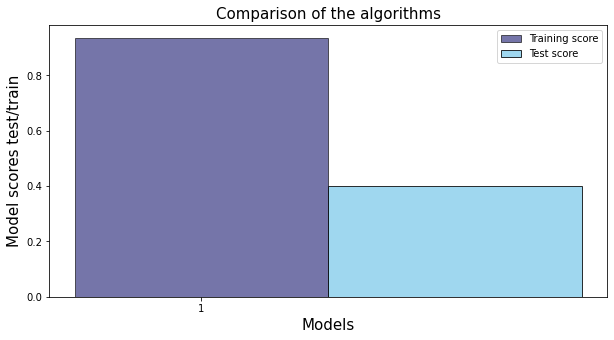

In [53]:


index=[1]
index_acc=[1.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model scores test/train',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='midnightblue',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='skyblue',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1])
plt.legend()
#plt.savefig("27.png")
plt.show()

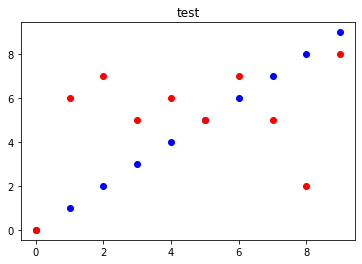

In [54]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "test")

### Still not enough predictive power 